### Glimpse into learning curves

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from load_modules import *
%matplotlib inline
fpath = Path(os.getcwd())
print('Current path:', fpath)

Current path: /vol/ml/apartin/projects/dr-learning-curves/nbs


In [2]:
# Settings
drop_bad_r2fit = False
# drop_bad_r2fit = True
dpi = 200

## Path to data

In [3]:
fname = 'all_scores.csv'
# dpath = Path('../lc.out.summit.July2020/exp_1_and_2')
# dirs = glob(str(dpath/'*'))
# print(dirs)

In [4]:
# dGBDT
model = 'dGBDT'
gdsc1_path = Path('../lc.out.new.r2fit_03/', f'lc.gdsc1.lgb.dflt', fname)
# gdsc2_path = Path('../lc.out.new.r2fit_03/', f'lc.gdsc2.lgb.dflt', fname)
# ctrp_path = Path('../lc.out.new.r2fit_03/', f'lc.ctrp.lgb.dflt', fname)
# nci_path = Path('../lc.out.nci60.lgb/lc.nci60.lgb.dflt', fname)

# mNN
"""
TODO!
Consider experiment. Build ML dfs for each source to contain the same number of training samples.
The total sample size is defined by the smallest dataset (GDSC2).
Generate LC using nn_reg1 (mNN) for each source and compare LC plots.
"""
# model = 'mNN'
# gdsc1_path = Path('../lc.out.new.r2fit_03/', f'lc.gdsc1.nn_reg1.ls_hpo', fname)
# gdsc2_path = Path('../lc.out.new.r2fit_03/', f'lc.gdsc2.nn_reg1.ls_hpo', fname)
# ctrp_path = Path('../lc.out.new.r2fit_03/', f'lc.ctrp.nn_reg1.ls_hpo', fname)
# nci_path = Path('../lc.out.summit.July2020/exp_1_and_2/lc.nci60.nn_reg1.random.ls_hpo', fname)

'\nTODO!\nConsider experiment. Build ML dfs for each source to contain the same number of training samples.\nThe total sample size is defined by the smallest dataset (GDSC2).\nGenerate LC using nn_reg1 (mNN) for each source and compare LC plots.\n'

In [5]:
outpath = fpath/'glimpse'
os.makedirs(outpath, exist_ok=True)

## Load data

In [6]:
gdsc1 = load_data(gdsc1_path, tr_set='te');
# gdsc2 = load_data(gdsc2_path, tr_set='te');
# ctrp = load_data(ctrp_path, tr_set='te');
# nci = load_data(nci_path, tr_set='te');

In [7]:
print_count(aa=gdsc1)
# print_count(aa=gdsc2)
# print_count(aa=ctrp)
# print_count(aa=nci)

,tr_size,one
0,10,20
1,12,20
2,16,20
3,20,20
4,26,20
5,33,20
6,42,20
7,53,20
8,68,20
9,86,20


In [8]:
if drop_bad_r2fit:
    gdsc1 = drop_bad_r2(gdsc1)
#     gdsc2 = drop_bad_r2(gdsc2)
#     ctrp  = drop_bad_r2(ctrp)
#     nci   = drop_bad_r2(nci)

In [9]:
def calc_gof(y, yfit):
    from sklearn import metrics
    gof = {}
    rmse = sqrt( metrics.mean_squared_error(y, yfit) )
    mae = metrics.mean_absolute_error(y, yfit)
    gof['rmse'] = rmse
    gof['mae'] = mae
    return gof

## Raw plots

In [10]:
# Global plotting params
# -------------------------------
met = 'mean_absolute_error';  # startParams = {'a': 1.2, 'b': -0.4, 'c': 0.04}

t_set = 'te'
xtick_scale = 'log2'
ytick_scale = 'log2'
# xtick_scale = 'linear'
# ytick_scale = 'linear'

kwargs = {'metric_name': met,
          'tr_set': t_set,
          'xtick_scale': xtick_scale,
          'ytick_scale': ytick_scale,
          'plot_median': True}

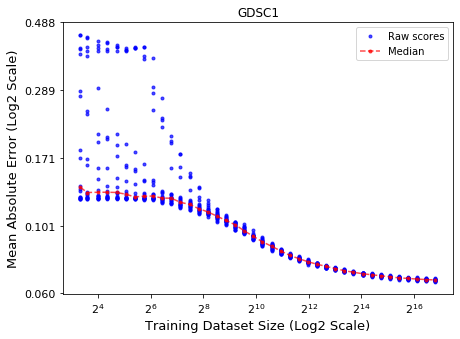

In [11]:
# Plot dGBDT (GDSC1)
# -------------------------------
kwargs.update({'title': f'GDSC1'})
ax = lc_plots.plot_lc_single_metric(gdsc1, **kwargs);
ax.legend(frameon=True, fontsize=10, loc='best')
ax.grid(False)

if drop_bad_r2fit:
    plt.savefig(outpath/f'{model}_gdsc1_drop_bad_r2fit.png', dpi=dpi)
else:
    plt.savefig(outpath/f'{model}_gdsc1.png', dpi=dpi)

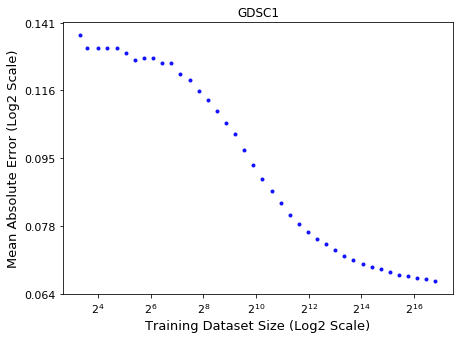

In [41]:
ax = None
data=gdsc1; name='GDSC1';
dfit_all = fit_data(data, x_fit_mn=0, x_fit_mx=None, method='binomial')
x_all = dfit_all['tr_size'].values
y_all = dfit_all['y'].values
color = 'b'

pnts_args_all = {'metric_name': met, 'xtick_scale': 'log2', 'ytick_scale': 'log2', 'alpha': 0.9, 'ls': '', 'marker': '.'}
ax = lc_plots.plot_lc(x=x_all, y=y_all, ax=ax, **pnts_args_all, color=color)

ax.set_title(f'{name}')
ax.grid(False)

plt.savefig(outpath/f'{model}_{name}_loglog.png', dpi=dpi)

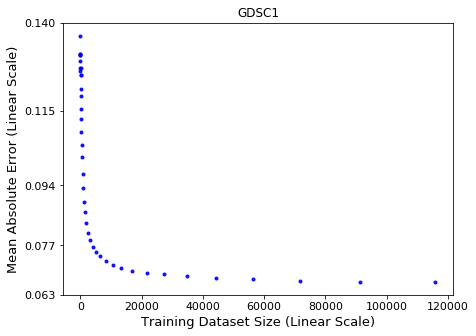

In [40]:
ax = None
data=gdsc1; name='GDSC1';
dfit_all = fit_data(data, x_fit_mn=0, x_fit_mx=None, method='binomial')
x_all = dfit_all['tr_size'].values
y_all = dfit_all['y'].values
color = 'b'

pnts_args_all = {'metric_name': met, 'xtick_scale': 'linear', 'ytick_scale': 'linear', 'alpha': 0.9, 'ls': '', 'marker': '.'}
ax = lc_plots.plot_lc(x=x_all, y=y_all, ax=ax, **pnts_args_all, color=color)

ax.set_title(f'{name}')
# ax.legend(frameon=True, fontsize=10, loc='best')
ax.grid(False)

plt.savefig(outpath/f'{model}_{name}_linlin.png', dpi=dpi)